##### 每個block有一個frame attention和global attention 要先對 block `extract_both_attentions` 再看要frame attention 的 value或global attention的value


In [15]:
from visualize_attention import (
    AttentionExtractor,
    extract_both_attentions,
    visualize_attention_on_image
)
from vggt.models.vggt import VGGT
from vggt.utils.load_fn import load_and_preprocess_images
import torch

# 載入模型和影像
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VGGT.from_pretrained("facebook/VGGT-1B").to(device)
model.eval()

images = load_and_preprocess_images(image_paths).to(device)

# 提取 attention
result = extract_both_attentions(model, images, block_idx=23)



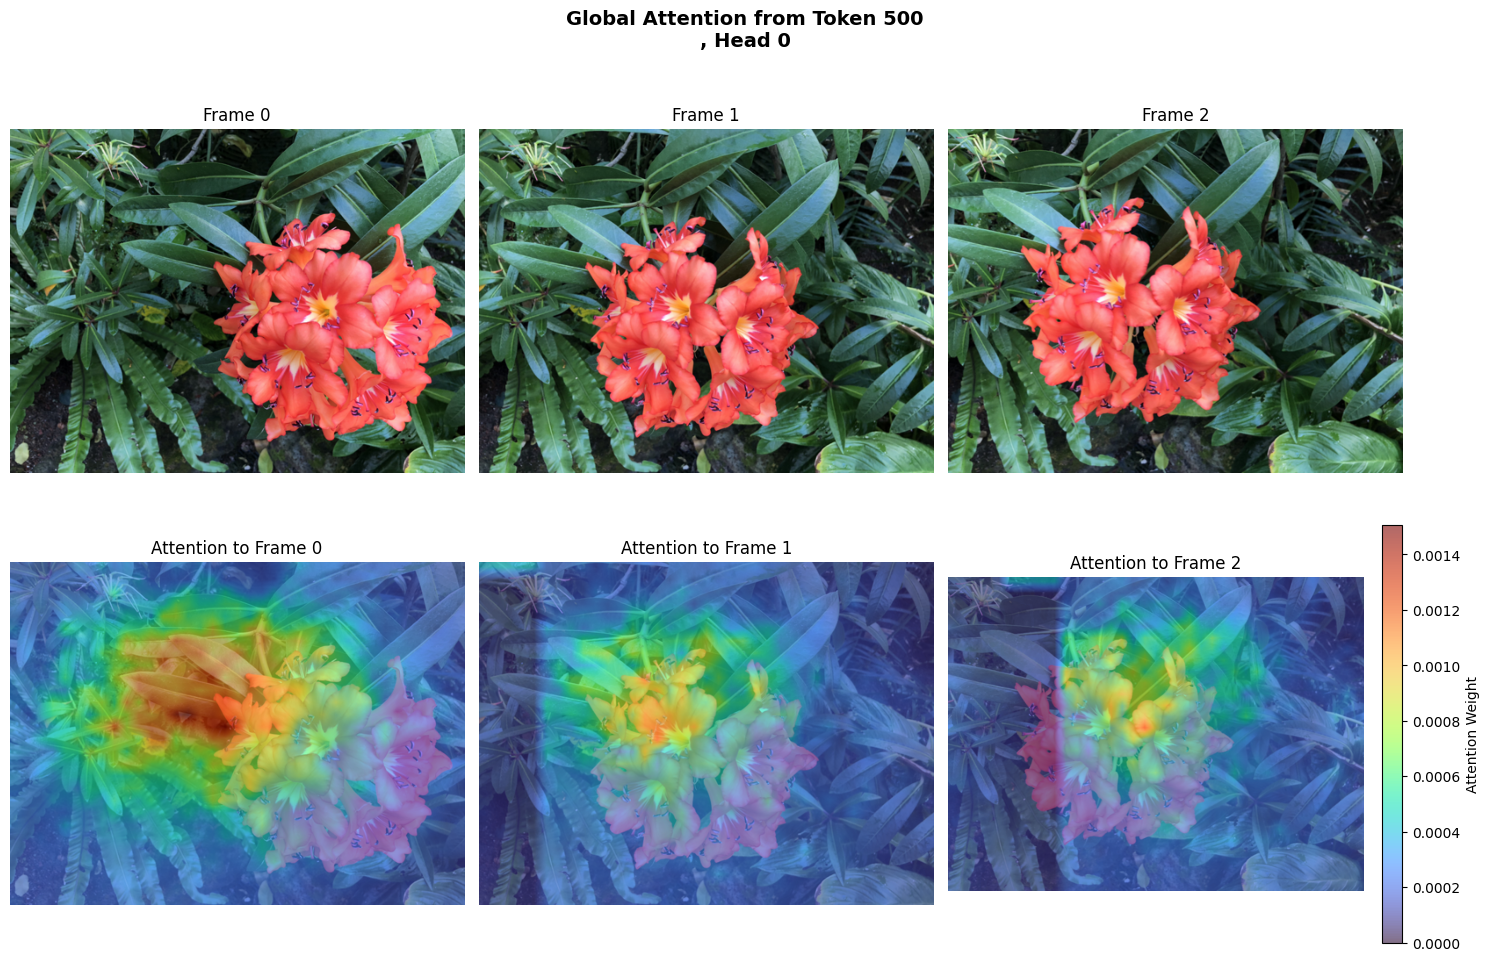

In [ ]:
# 可視化特定 token
fig = visualize_attention_on_image(
    attn_weights=result['global_attention']['attn_weights'],
    images=images,
    token_idx=500,
    head_idx=0,
    patch_start_idx=result['patch_start_idx'],
    attention_type='global' # global or frame
)

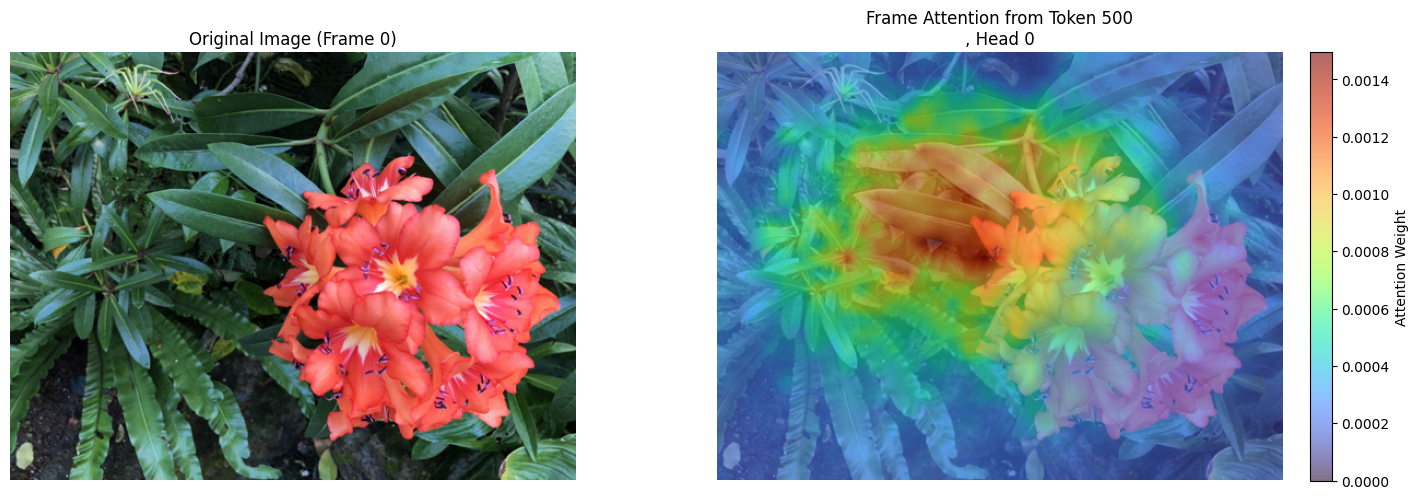

In [ ]:
# 可視化特定 token
fig = visualize_attention_on_image(
    attn_weights=result['global_attention']['attn_weights'],
    images=images,
    token_idx=500,
    head_idx=0,
    patch_start_idx=result['patch_start_idx'],
    attention_type='frame' # global or frame
)

In [17]:
from visualize_attention import get_attention_values, extract_both_attentions
# 取得純數值（不做可視化）
global_values = get_attention_values(
    attn_weights=result['global_attention']['attn_weights'],
    images=images,
    token_idx=500,
    head_idx=0,
    patch_start_idx=result['patch_start_idx'],
    attention_type='global'
)

# Frame Attention
frame_values = get_attention_values(
    attn_weights=result['frame_attention']['attn_weights'],
    images=images,
    token_idx=500,
    head_idx=0,
    patch_start_idx=result['patch_start_idx'],
    attention_type='frame'
)


In [18]:
global_values.keys()

dict_keys(['images', 'metadata', 'attention_maps', 'attention_maps_resized'])

In [19]:
frame_values.keys()

dict_keys(['images', 'metadata', 'attention_maps', 'attention_maps_resized'])

In [23]:
len(frame_values['attention_maps'])

28